In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from sklearn.linear_model import LinearRegression

In [2]:
df_20 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/QbStats2020.csv")
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/QbStats2021.csv")

In [3]:
df_20 = df_20[df_20.G >= 12].reset_index(drop=True)
df_20.head()

,RANK,PLAYER,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Josh Allen (BUF),396,572,69.2,"4,544",7.9,37,10,26,102,421,8,6,16,405.2,25.3,99.9%
1,2,Kyler Murray (ARI),375,558,67.2,"3,971",7.1,26,12,27,133,819,11,4,16,390.7,24.4,97.5%
2,3,Aaron Rodgers (GB),372,526,70.7,"4,299",8.2,48,5,20,38,149,3,2,16,387.1,24.2,94.6%
3,4,Patrick Mahomes II (KC),390,588,66.3,"4,740",8.1,38,6,22,62,308,2,2,15,380.3,25.4,99.9%
4,5,Deshaun Watson (CLE),382,544,70.2,"4,823",8.9,33,7,49,90,444,3,3,16,376.4,23.5,65.0%


In [4]:
df_21 = df_21[df_21.G >=12].reset_index(drop=True)
df_21.head()

,RANK,PLAYER,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Josh Allen (BUF),409,646,63.3,"4,407",6.8,36,15,26,122,763,6,3,17,417.7,24.6,99.9%
1,2,Justin Herbert (LAC),443,672,65.9,"5,014",7.5,38,15,31,63,302,3,1,17,395.6,23.3,99.8%
2,3,Tom Brady (TB),485,719,67.5,"5,316",7.4,43,12,22,28,81,2,3,17,386.7,22.7,97.1%
3,4,Patrick Mahomes II (KC),436,658,66.3,"4,828",7.3,37,13,28,66,381,2,4,17,374.2,22.0,99.9%
4,5,Matthew Stafford (LAR),404,601,67.2,"4,886",8.1,41,17,30,32,43,0,2,17,346.8,20.4,93.8%


In [10]:
df_20.loc[0:27, 'FPTS/G'].corr(df_21.loc[0:27, 'FPTS/G'])

0.8310516248012539

In [11]:
x = df_20['FPTS/G'][0:27].values.reshape(-1,1)

y = df_21['FPTS/G'][0:27].values.reshape(-1,1)

reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.6906468030848044

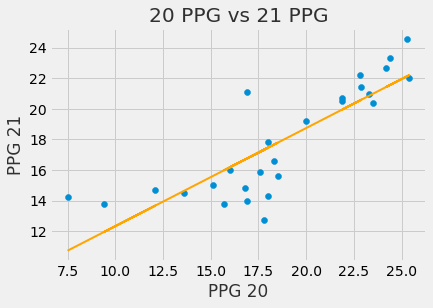

In [15]:
plt.figure()

plt.scatter(x=df_20.loc[0:26,'FPTS/G'], y = df_21.loc[0:26, 'FPTS/G'])

yhat = reg.coef_ * x + reg.intercept_
plt.plot(x, yhat, lw=2, c='orange')

plt.xlabel('PPG 20', alpha = .8)
plt.ylabel('PPG 21', alpha=0.8)
plt.title('20 PPG vs 21 PPG', alpha = 0.8)
plt.style.use('fivethirtyeight')


plt.show()

In [16]:
def predict_ppg(x):
    score = np.array([[x]])
    prediction = reg.predict(score)
    
    return prediction[0,0]

In [23]:
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/QbStats2021.csv")

In [24]:
df_22 = df_21.copy()
df_22 = df_22[['PLAYER', 'FPTS/G']]
df_22.head()

,PLAYER,FPTS/G
0,Josh Allen (BUF),24.6
1,Justin Herbert (LAC),23.3
2,Tom Brady (TB),22.7
3,Patrick Mahomes II (KC),22.0
4,Matthew Stafford (LAR),20.4


In [25]:
df_22['FPTS/G 22'] = 0
df_22.head()

,PLAYER,FPTS/G,FPTS/G 22
0,Josh Allen (BUF),24.6,0
1,Justin Herbert (LAC),23.3,0
2,Tom Brady (TB),22.7,0
3,Patrick Mahomes II (KC),22.0,0
4,Matthew Stafford (LAR),20.4,0


In [26]:
df_22['FPTS/G 22'] = df_22.apply(lambda x: predict_ppg(x['FPTS/G']), axis = 1)
df_22['FPTS 22'] = np.round(df_22['FPTS/G 22'] * 17,2)
df_22.sort_values('FPTS 22', ascending=False, inplace=True)
df_22.reset_index(drop = True, inplace = True)
df_22.index = df_22.index + 1
df_22.head()

,PLAYER,FPTS/G,FPTS/G 22,FPTS 22
1,Josh Allen (BUF),24.6,21.696616,368.84
2,Justin Herbert (LAC),23.3,20.861758,354.65
3,Tom Brady (TB),22.7,20.476439,348.10
4,Kyler Murray (ARI),22.2,20.155340,342.64
5,Patrick Mahomes II (KC),22.0,20.026900,340.46


In [28]:
df_22.to_csv('qb_rankings.csv')